This is a Sunny port of SpinW tutorial 5, originally authored by Bjorn Fak and Sandor Toth. The goal is to calculate the spin wave spectrum of Ferromagnetic first neighbour Kagome lattice.

Load Packages

In [1]:
using Sunny, GLMakie, CairoMakie  

Set up the lattice, the position of magnetic atoms, the symmetry inequivalent postions and the spin. Space group is P-3 or 147. Only one magnetic atom needs to be specified because sunny can use the space group symmetry to generate the rest of the atoms in the cell. Here Cu+ atoms have spin = 1. 

In [2]:
a=6.0
b=6.0
c=5.0
units=Units(:meV)
latvecs = lattice_vectors(a, b, c, 90, 90, 120) 
positions=[[1/2, 0, 0]]
types=["Cu1"]
Cu = Crystal(latvecs,positions,147;types)
GLMakie.activate!()
view_crystal(Cu,5)

┌ Warning: view_crystal(cryst, max_dist) is deprecated! Use `view_crystal(cryst)` instead. See also optional `ghost_radius` argument.
└ @ PlottingExt /Users/bhushanthipe/.julia/packages/Sunny/lN59K/ext/PlottingExt.jl:660


Create a system with a lattice size (1,1,1) since it is a ferromagnetic system. The spin is 1.

In [3]:
sys=System(Cu, (1,1,1),[SpinInfo(1,S=1,g=2)], :dipole, seed=0)

System [Dipole mode]
Lattice (1×1×1)×3
Energy per site 0


Set up the exchanges. Randomize the spins and minimize the energy to obtain the ground state of the system.

In [4]:
J1=-1.0

set_exchange!(sys,J1,Bond(2, 3, [0, 0, 0]))
randomize_spins!(sys)
minimize_energy!(sys)
plot_spins(sys)

Create the LSWT object and set up a path. Obtain the dispersion and intensity bands.

In [5]:
swt=SpinWaveTheory(sys;measure=ssf_perp(sys))
q_points = [[-1/2,0,0], [0,0,0], [1/2,1/2,0]]
density = 400
path = q_space_path(Cu, q_points, density);
res = intensities_bands(swt, path)

Sunny.BandIntensities{Float64} (3×400 elements)

Plot the results for dispersion band and intensities.

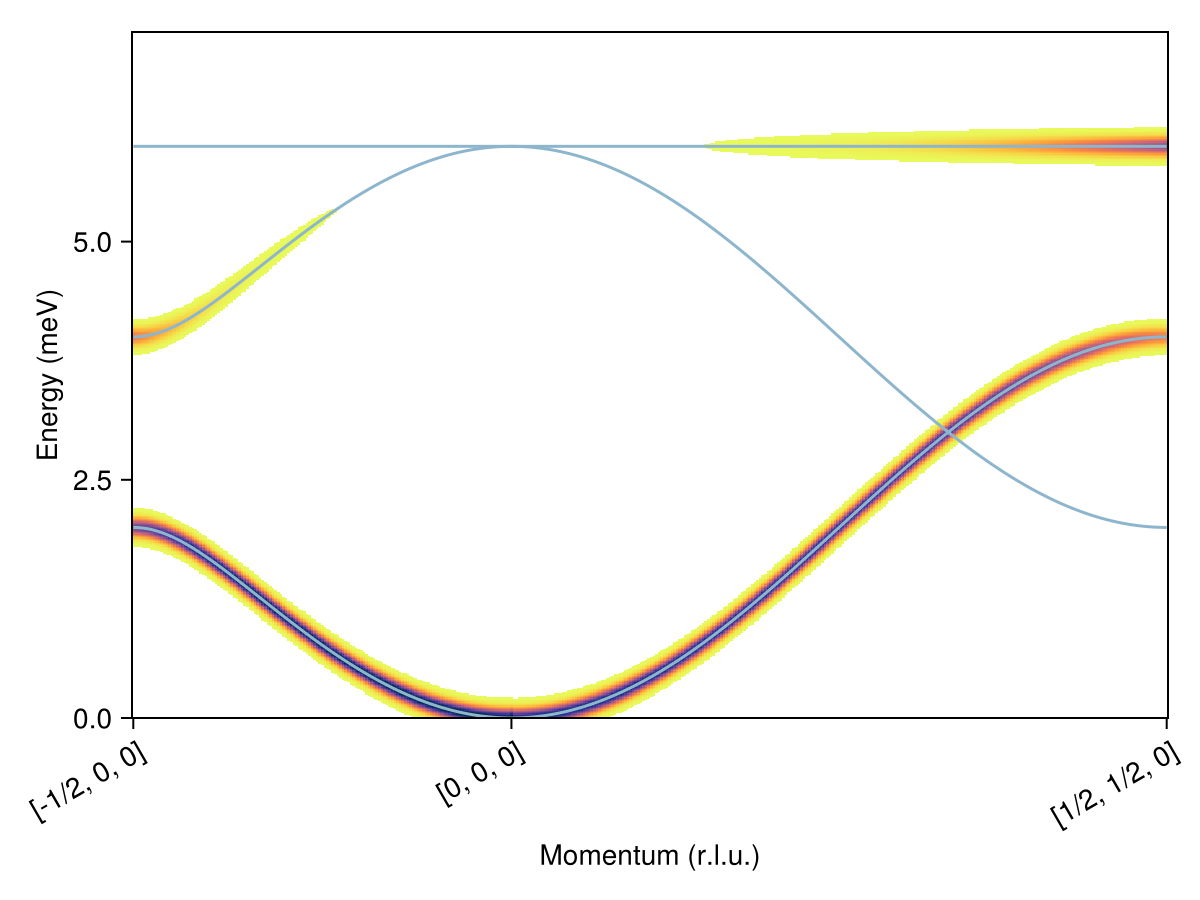

In [6]:
CairoMakie.activate!()
Sunny.BandIntensities{Float64}
plot_intensities(res; units)

Plot the powder averaged results.

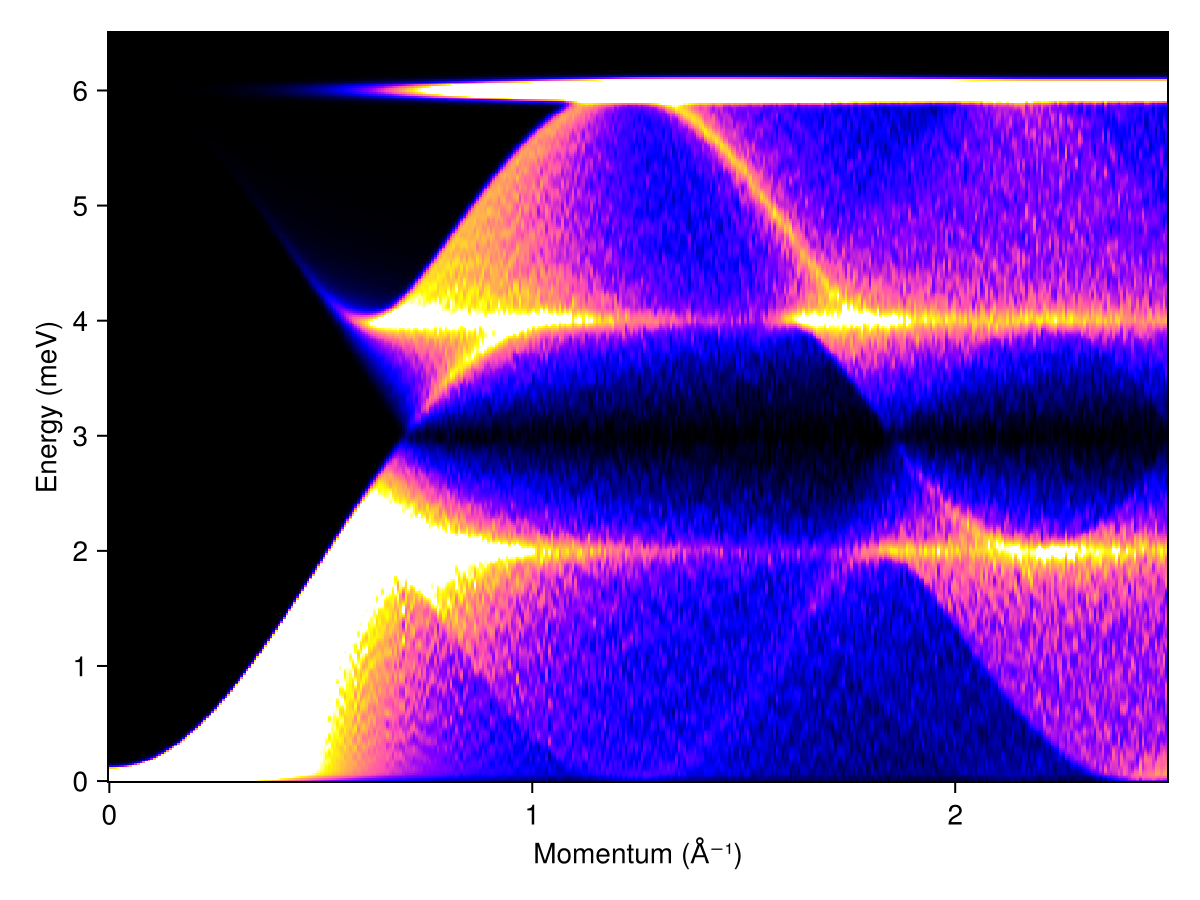

In [7]:
radii = range(0, 2.5, 400) # (1/Å)
energies = range(0, 6.5, 400)
kernel = gaussian(fwhm=0.1)
res = powder_average(Cu, radii, 1600) do q_points
    intensities(swt, q_points; energies, kernel)
end
plot_intensities(res; units, colorrange=(0,2.5))